In [1]:
# ! pip install ipynb
from ipynb.fs.full.my_functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [2]:
ilc = pd.read_csv(r'C:\Users\dvale\TFM\Data\ilc.csv', low_memory=False)

In [3]:
unflaged_columns = unflag(ilc.columns)
ilc = ilc[unflaged_columns]

In [4]:
ilc = ilc.drop(irrelevant_columns, axis=1)

In [5]:
sociodemo = pd.read_csv(r'C:\Users\dvale\TFM\Data\sociodemo.csv')
other = sociodemo.copy()
other = other[['id', 'weight', 'material_deprivation', 'sex', 'age']]

In [6]:
other.head()

,id,weight,material_deprivation,sex,age
0,101,906.15830,No,Male,70
1,102,906.15830,No,Female,68
2,201,1227.68869,No,Female,72
3,202,1227.68869,No,Male,60
4,301,2559.35987,No,Female,54


In [7]:
other['people_dweling'] = ilc['Number of people in dweling']

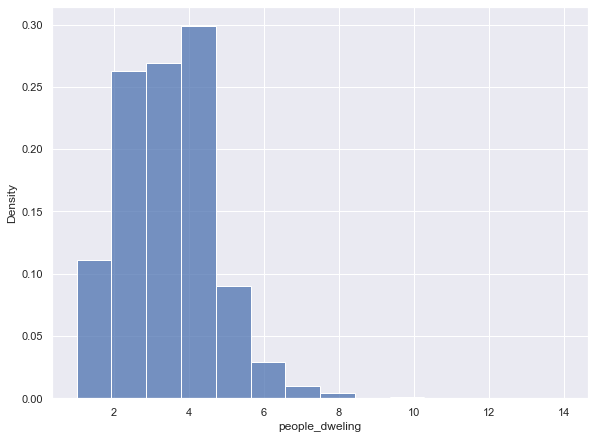

In [8]:
histplot(x='people_dweling', data=other, bins=other.people_dweling.max())

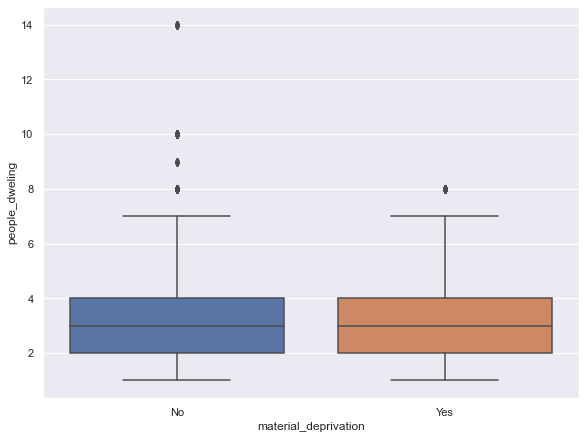

In [9]:
boxplot(x='material_deprivation', y='people_dweling', data=other)

In [10]:
other['num_rooms'] = ilc['Number of rooms available to the household'].apply(lambda x: int(x) if x != ' ' else np.nan)

In [11]:
other.num_rooms = other.num_rooms.fillna(other.num_rooms.mode())

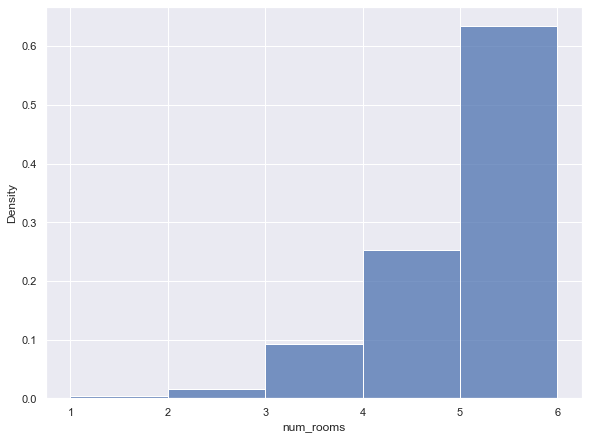

In [12]:
histplot(x='num_rooms', data=other, bins=5)

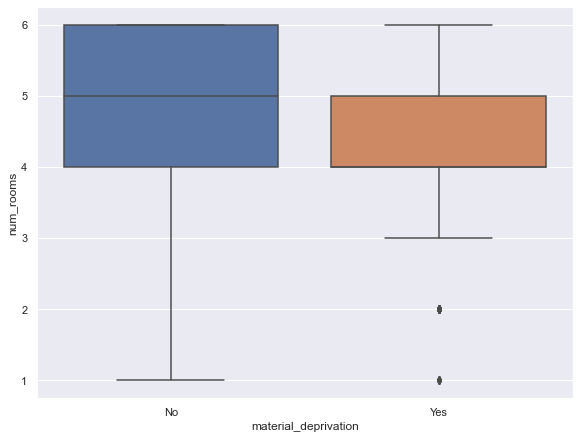

In [13]:
boxplot(x='material_deprivation', y='num_rooms', data=other)

In [14]:
other['person_room'] = other.num_rooms/other.people_dweling

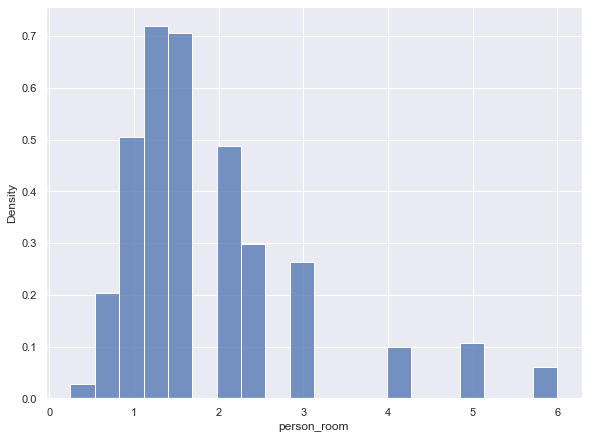

In [15]:
histplot(x='person_room', data=other, bins=20)

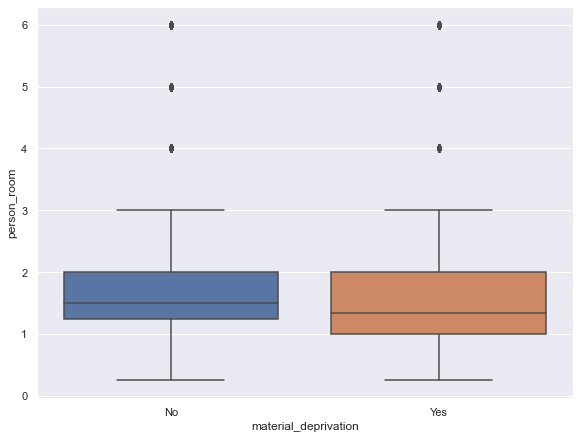

In [16]:
boxplot(x='material_deprivation', y='person_room', data=other)

In [17]:
other = other.drop(['people_dweling', 'num_rooms'], axis=1)
other.head()

,id,weight,material_deprivation,sex,age,person_room
0,101,906.15830,No,Male,70,2.500000
1,102,906.15830,No,Female,68,2.500000
2,201,1227.68869,No,Female,72,2.500000
3,202,1227.68869,No,Male,60,2.500000
4,301,2559.35987,No,Female,54,1.666667


In [18]:
ilc['General health'].unique()

array(['Bad', 'Good', 'Fair', nan, 'Very good', 'Very bad'], dtype=object)

In [19]:
other['self_perceived_bad_health'] = ilc['General health'].map({'Very good': 'No', 
                                                               'Good': 'No', 
                                                               'Fair': 'No', 
                                                               'Bad': 'Yes', 
                                                               'Very bad': 'Yes'})

other.self_perceived_bad_health.value_counts(dropna=False)

No     30756
NaN     6656
Yes     2440
Name: self_perceived_bad_health, dtype: int64

In [20]:
other.self_perceived_bad_health = other.self_perceived_bad_health.fillna('Missing')

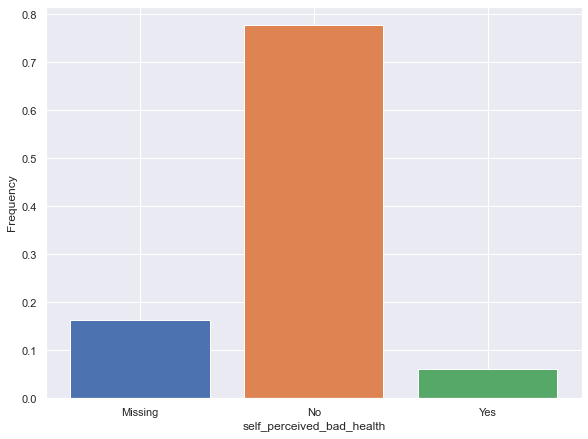

In [21]:
barplot(x='self_perceived_bad_health', data=other)

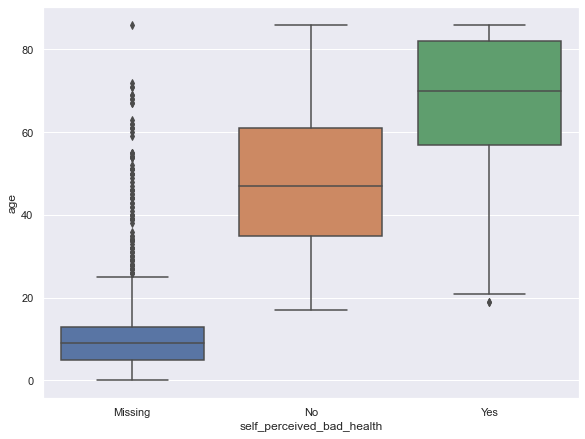

In [22]:
boxplot(x='self_perceived_bad_health', y='age', data=other)

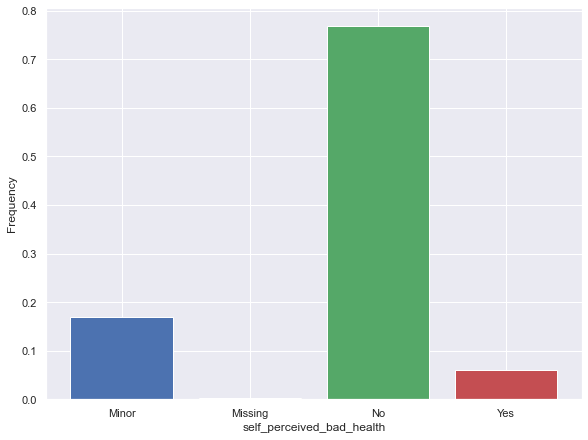

In [23]:
other.self_perceived_bad_health = other.apply(lambda row: "Minor" 
                                              if row['age'] < 18 
                                              else row['self_perceived_bad_health'],
                                              axis=1)

barplot(x='self_perceived_bad_health', data=other)

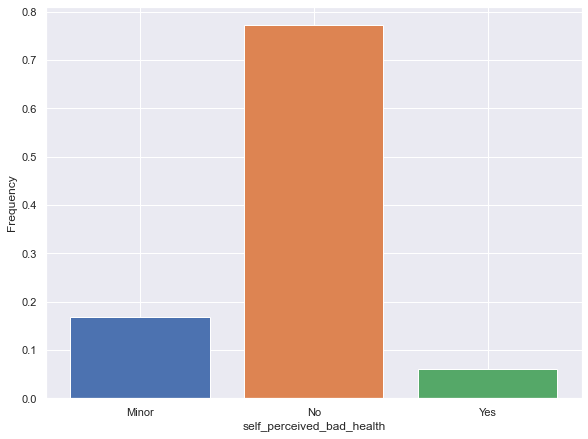

In [24]:
other.self_perceived_bad_health = other.apply(lambda row: other.self_perceived_bad_health.mode()[0] 
                                              if row['self_perceived_bad_health'] == 'Missing'
                                              else row['self_perceived_bad_health'],
                                              axis=1)

barplot(x='self_perceived_bad_health', data=other)

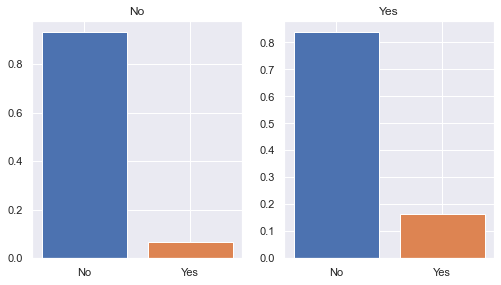

In [25]:
bardiagram(x='material_deprivation', hue='self_perceived_bad_health', data=other[other.age > 18])

In [26]:
other['has_health_limitations'] = ilc['Limitation in activities because of health problems']
other.has_health_limitations.value_counts(dropna=False)

No, not limited          26833
NaN                       6657
Yes, limited              5078
Yes, strongly limited     1284
Name: has_health_limitations, dtype: int64

In [27]:
other.has_health_limitations = other.has_health_limitations.fillna('Missing')

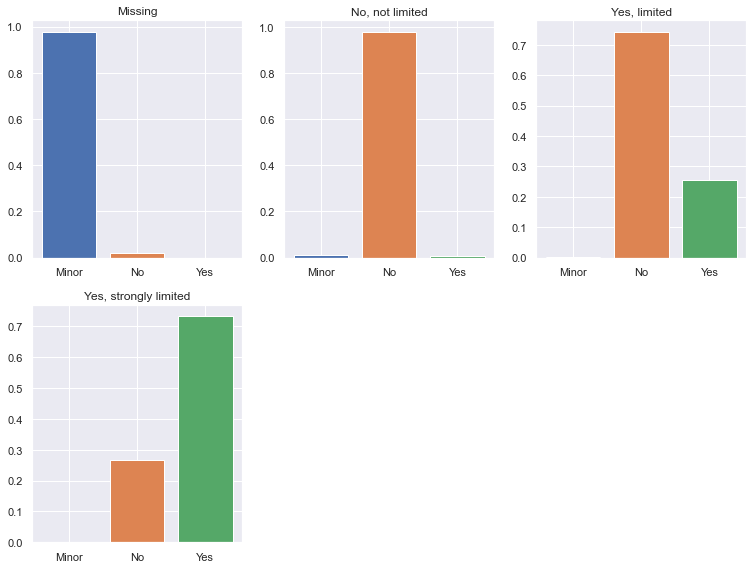

In [28]:
bardiagram(x='has_health_limitations', hue='self_perceived_bad_health', data=other)

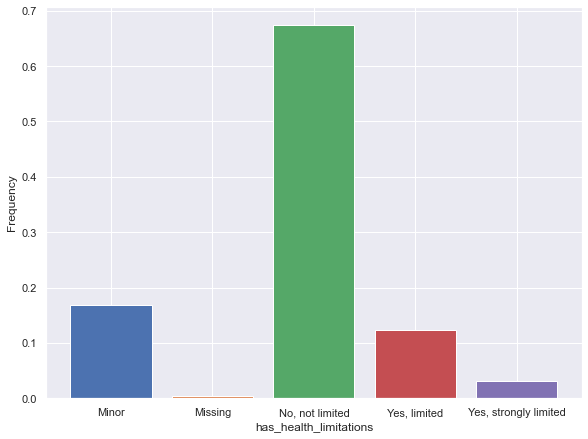

In [29]:
other.has_health_limitations = other.apply(lambda row: "Minor" 
                                           if row['age'] < 18 
                                           else row['has_health_limitations'],
                                           axis=1)

barplot(x='has_health_limitations', data=other)

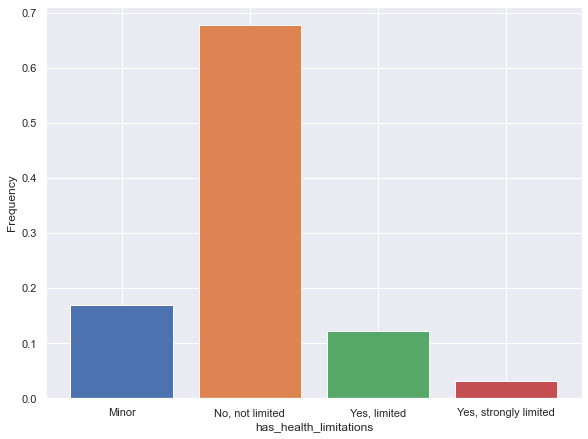

In [30]:
other.has_health_limitations = other.apply(lambda row: other.has_health_limitations.mode()[0] 
                                           if row['has_health_limitations'] == 'Missing'
                                           else row['has_health_limitations'],
                                           axis=1)

barplot(x='has_health_limitations', data=other)

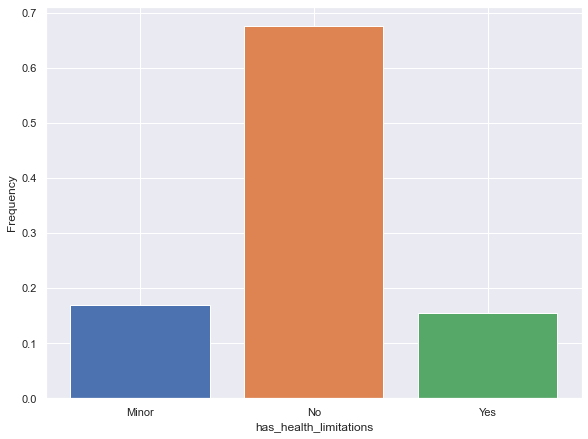

In [31]:
other['has_health_limitations'] = other.has_health_limitations.map({'Yes, limited': 'Yes',
                                                                    'Yes, strongly limited': 'Yes', 
                                                                    'No, not limited': 'No',
                                                                    'Minor': 'Minor'})

barplot(x='has_health_limitations', data=other)

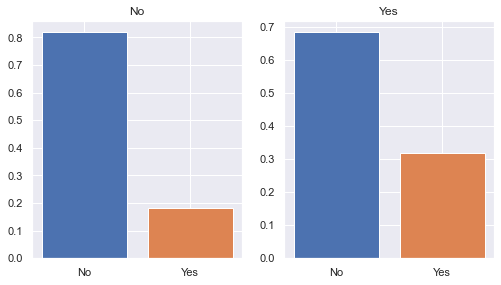

In [32]:
bardiagram(x='material_deprivation', hue='has_health_limitations', data=other[other.age > 18])

In [33]:
other['has_chronic_condition'] = ilc['Suffer from any chronic (long-standing) illness or condition']

other.has_chronic_condition = other.apply(lambda row: "Minor" 
                                          if row['age'] < 18 
                                          else row['has_chronic_condition'],
                                          axis=1)

other.has_chronic_condition = other.has_chronic_condition.fillna('No')

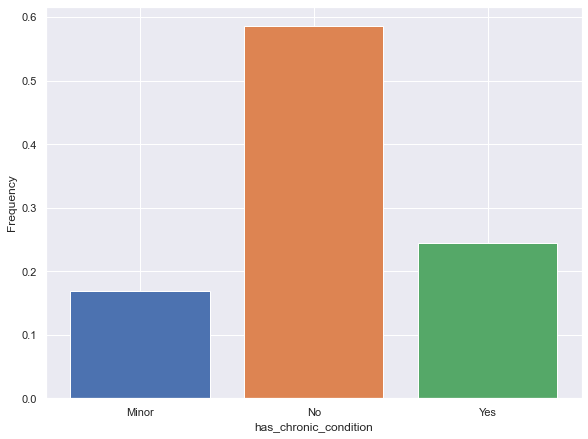

In [34]:
barplot(x='has_chronic_condition', data=other)

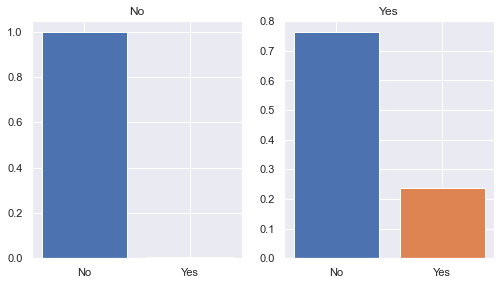

In [35]:
bardiagram(x='has_chronic_condition', hue='self_perceived_bad_health', data=other[other.age > 18])

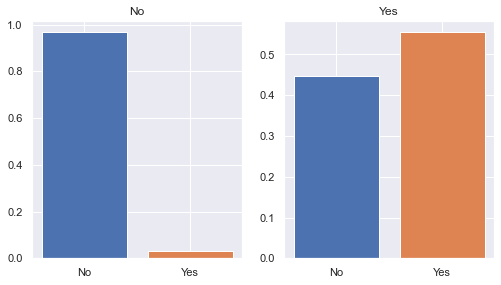

In [36]:
bardiagram(x='has_chronic_condition', hue='has_health_limitations', data=other[other.age > 18])

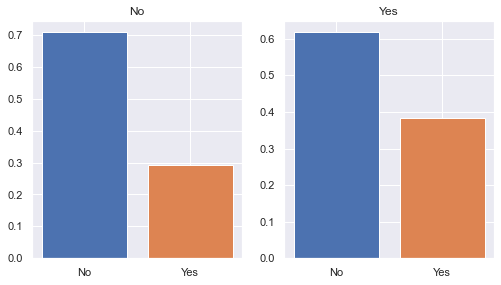

In [37]:
bardiagram(x='material_deprivation', hue='has_chronic_condition', data=other[other.age > 18])

In [38]:
ilc['Unmet need for medical examination or treatment'].value_counts(dropna=False)

No, there was no occasion when the person really needed examination or treatment but did not receive it               25242
NaN                                                                                                                   14475
Yes, there was at least one occasion when the person really needed examination or treatment but did not receive it      135
Name: Unmet need for medical examination or treatment, dtype: int64

In [39]:
other['unmet_medical_treatment'] = ilc['Unmet need for medical examination or treatment'].fillna('Missing').map({'Missing': 'No', 
                                                                                                                 'No, there was no occasion when the person really needed examination or treatment but did not receive it': 'No', 
                                                                                                                 'Yes, there was at least one occasion when the person really needed examination or treatment but did not receive it': 'Yes'})

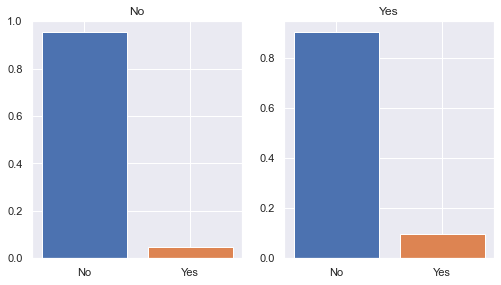

In [40]:
bardiagram(x='unmet_medical_treatment', hue='material_deprivation', data=other)

In [41]:
other.head()

,id,weight,material_deprivation,sex,age,person_room,self_perceived_bad_health,has_health_limitations,has_chronic_condition,unmet_medical_treatment
0,101,906.15830,No,Male,70,2.500000,Yes,Yes,Yes,No
1,102,906.15830,No,Female,68,2.500000,No,No,Yes,No
2,201,1227.68869,No,Female,72,2.500000,No,No,No,No
3,202,1227.68869,No,Male,60,2.500000,No,No,No,No
4,301,2559.35987,No,Female,54,1.666667,No,Yes,Yes,No


In [42]:
ilc['Main source of help against material deprivation'].value_counts(dropna=False)

Not applicable                      26834
NaN                                  6656
From partner                         2225
From other family members            1943
From nobody                          1623
From hired individuals                298
From social services                  174
From other people                      47
From neighbours or acquaintances       39
Missing                                 7
From charities                          6
Name: Main source of help against material deprivation, dtype: int64

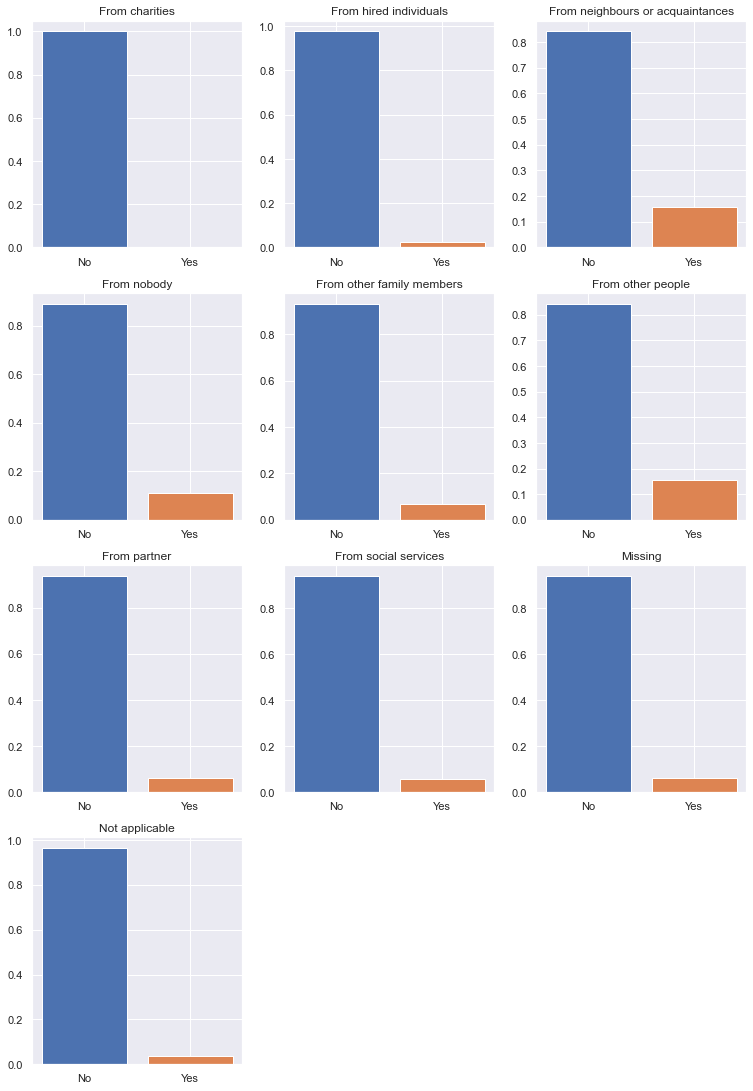

In [43]:
other['has_support_net'] = ilc['Main source of help against material deprivation'].fillna('Missing')

bardiagram(x='has_support_net', hue='material_deprivation', data=other)

In [44]:
other.has_support_net = other.apply(lambda row: 'No' if row['has_support_net'] == 'From nobody' else 'Yes', axis=1)

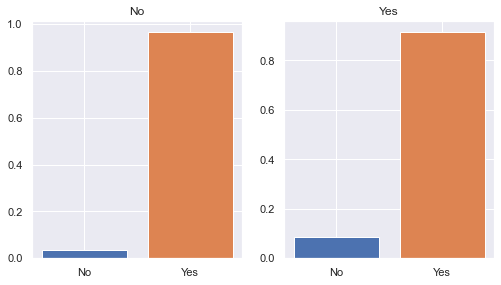

In [45]:
bardiagram(x='material_deprivation', hue='has_support_net', data=other)

In [286]:
other = other.drop(['sex', 'age'], axis=1)

In [287]:
other.to_csv('other.csv')

In [5]:
for c in ilc.columns:
    print(c)

Personal ID
Personal cross-sectional weight
Year of birth
Sex
Basic activity status
Education at pre-school
Education at compulsory school
Childcare at centre-based services
Childcare at day-care centre
Childcare by a professional child-minder at child's home or at child-minder’s home
Childcare by grand-parents, other household members (outside parents), other relatives, friends or neighbours
Childrens’ cross-sectional weight for childcare
Living in household with low employement level
Living in household under risk of poverty
Marital status
Consensual Union
Country of birth
Citizenship
Current education activity
ISCED level currently attended
Year when highest level of education was attained
Highest ISCED level attained
Self-defined current economic status
Whether person has ever worked
Actively looking for a job
Available for work
Status in employment
Occupation
Number of hours usually worked per week in main job
Number of months spent at full-time work as employee
Number of months s